# **Hello and welcome to this notebook.**


You will find here a study on the categorization of stars based on some of their main features by an algorithm of machine learning.

This study is based on a dataset provided by [Kaggle](https://www.kaggle.com/). You can find more informations [here](https://https://www.kaggle.com/deepu1109/star-dataset) on the studied dataset.

Hope you will enjoy it !

Author : Thomas Llobregat (thomas.llobregat@gmail.com)



# **Abstract**




# **I - Data loading and documentary search**

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [305]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/Portfolio")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
df = pd.read_csv('stars.csv')   
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [307]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


**Explanations of the features :**

* **Temperature** : This feature is the surface temperature of several stars, measured in Kelvin (K). The Kelvin is the base unit of temperature in the International System of Units.

* **Luminosity** : This feature consists of the luminosity of several stars calculated with respect to sun (L/Lo) (No unit hence). The luminosity is an absolute measure of radiant power. Its value is independent of an observer's distance from an object.

* **Radius** : This column consists of the Radius of several stars calculated with respect to sun (R/Ro) (No unit hence).

* **Absolute Magnitude** : This column consists of the Absolute Visual magnitude (Mv) of several stars. The Absolute magnitude is a measure of the luminosity of a celestial object, on an inverse logarithmic astronomical magnitude scale (The lesser it is, the brighter the object is). The absolute magnitude is defined to be equal to the apparent magnitude that the object would have if it were viewed from a distance of exactly 10 parsecs (32.6 light-years), without extinction (or dimming) of its light due to absorption by interstellar matter and cosmic dust.

* **Star Type** : This column is the output class (6 classes ranging from 0-5) base on the Yerkes spectral classification (also called the MKK system from the authors' initials) It is a system of stellar spectral classification introduced in 1943 by William Wilson Morgan, Philip C. Keenan, and Edith Kellman from Yerkes Observatory output from the Hertzsprung–Russell diagram (Absolute Magnitude in function of the stellar type)

  * *0 -> Brown Dwarf*  : A brown dwarf is a substellar object not massive enough to ever fuse hydrogen into helium, but still massive enough to fuse deuterium. It is less than about 0.08 solar masses and more than about 13 Jupiter masses (0.01 solar masses).
  * *1 -> Red Dwarf* : A red dwarf is the smallest and coolest kind of star on the main sequence. The coolest red dwarfs near the Sun have a surface temperature of ~2,000 K and the smallest have radii of ~9% that of the Sun, with masses about 0.075 solar masses. These red dwarfs have spectral classes of L0 to L2. There is some overlap with the properties of brown dwarfs.
  * *2 -> White Dwarf* : A white dwarf is a star composed of electron-degenerate matter, thought to be the final stage in the evolution of stars not massive enough to collapse into a neutron star or black hole—stars less massive than roughly 9 solar masses.
  * *3 -> Main Sequence* : A star of the main sequence, or dwarf star is a star of relatively small size and low luminosity.
  * *4 -> SuperGiants* : Supergiant stars are among the most massive and most luminous stars with absolute visual magnitudes between about −3 and −8. The temperature range of supergiant stars spans from about 3,400 K to over 20,000 K.
  * *5 -> HyperGiants* : A hypergiant (luminosity class 0 or Ia+) is a very rare type of star that has an extremely high luminosity, mass and size.

* **Star color** : This column contains the info about the colors of each star after Spectral Analysis. This is a pure text field.

* **Spectral Class** : This column contains info about the spectral classes of each star(O,B,A,F,G,K,,M)


**The HERTZSPRUNG-RUSSEL diagram :**

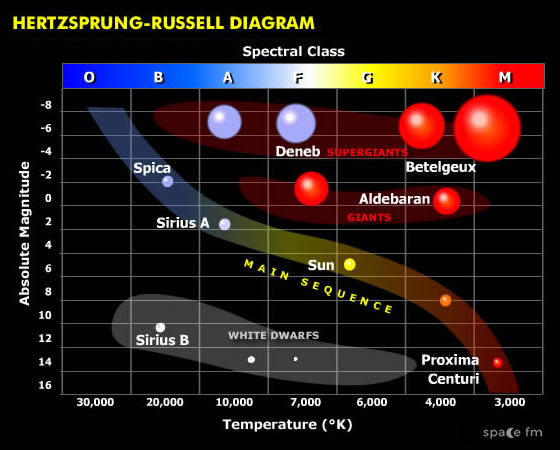

# **II - Data comprehension and cleaning**

## **Generating the Hertzsprung-Russel diagram from the dataset.**

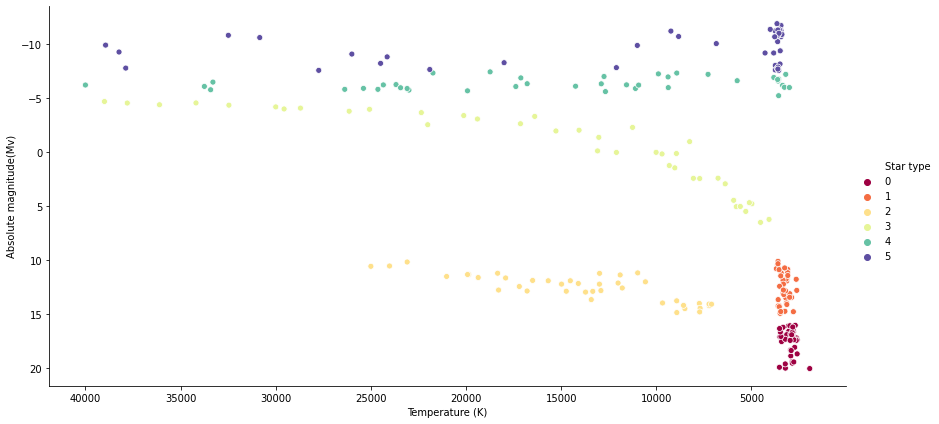

In [308]:
g = sns.relplot(x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", legend="full", palette="Spectral", height=6, aspect=2, data=df);

g.fig.axes[0].invert_xaxis()
g.fig.axes[0].invert_yaxis()

The data is very **clustered**. Each target feature (represent by a color) is in a local space with almost no conflict.

We also see that the temperature does not give much valuable information.
For instance, types 3, 4 & 5 (respectively Main Sequence, SuperGiants & HyperGiants) can be of any temperature. 

The only information given is that types 1 & 2 are really cold and types 3 is of a medium range temperature.

## **Preparing the data to output the correlation matrix.**



### Cleaning the spectral class column

In [309]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [310]:
print(f"Is there any null value ? { 'Yes' if (pd.isna(['Spectral Class'])) else 'No' }")

Is there any null value ? No


In [311]:
Spectral = pd.get_dummies(df['Spectral Class'])
df.drop('Spectral Class',axis=1,inplace=True)
df = pd.concat([df,Spectral],axis=1)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,Red,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,Red,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,Red,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,Red,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,Red,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,Blue,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,White,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,White,1,0,0,0,0,0,0


### Cleaning the star color column

In [312]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
white                   3
Blue white              3
yellowish               2
Whitish                 2
Orange                  2
Orange-Red              1
Blue                    1
Yellowish               1
White-Yellow            1
Pale yellow orange      1
Blue-White              1
Blue white              1
Name: Star color, dtype: int64

We saw above that the star color column contains non-processable data. We will first clean it so it match only categorical colors and then dummy them.

In [313]:
df['Star color'].replace({'Blue-white': 'Blue'}, inplace=True)
df['Star color'].replace({'Blue white': 'Blue'}, inplace=True)
df['Star color'].replace({'Blue white ': 'Blue'}, inplace=True)
df['Star color'].replace({'Blue White': 'Blue'}, inplace=True)
df['Star color'].replace({'Blue-White': 'Blue'}, inplace=True)
df['Star color'].replace({'Blue ': 'Blue'}, inplace=True)
df['Star color'].replace({'yellow-white': 'Yellow'}, inplace=True)
df['Star color'].replace({'Yellowish White': 'Yellow'}, inplace=True)
df['Star color'].replace({'Yellowish': 'Yellow'}, inplace=True)
df['Star color'].replace({'yellowish': 'Yellow'}, inplace=True)
df['Star color'].replace({'Pale yellow orange': 'Yellow'}, inplace=True)
df['Star color'].replace({'white': 'White'}, inplace=True)
df['Star color'].replace({'White-Yellow': 'White'}, inplace=True)
df['Star color'].replace({'Whitish': 'White'}, inplace=True)
df['Star color'].replace({'Orange-Red': 'Orange'}, inplace=True)
df['Star color'].value_counts()

Red       112
Blue       97
Yellow     15
White      13
Orange      3
Name: Star color, dtype: int64

In [314]:
Colors = pd.get_dummies(df['Star color'])
df.drop('Star color',axis=1,inplace=True)
df = pd.concat([df,Colors],axis=1)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,A,B,F,G,K,M,O,Blue,Orange,Red,White,Yellow
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,1,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,1,1,0,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,1,1,0,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,1,0,0,0,0,0,0,0,0,0,1,0
238,9235,404940.000000,1112.0000,-11.23,5,1,0,0,0,0,0,0,0,0,0,1,0


## **The correlation matrix**

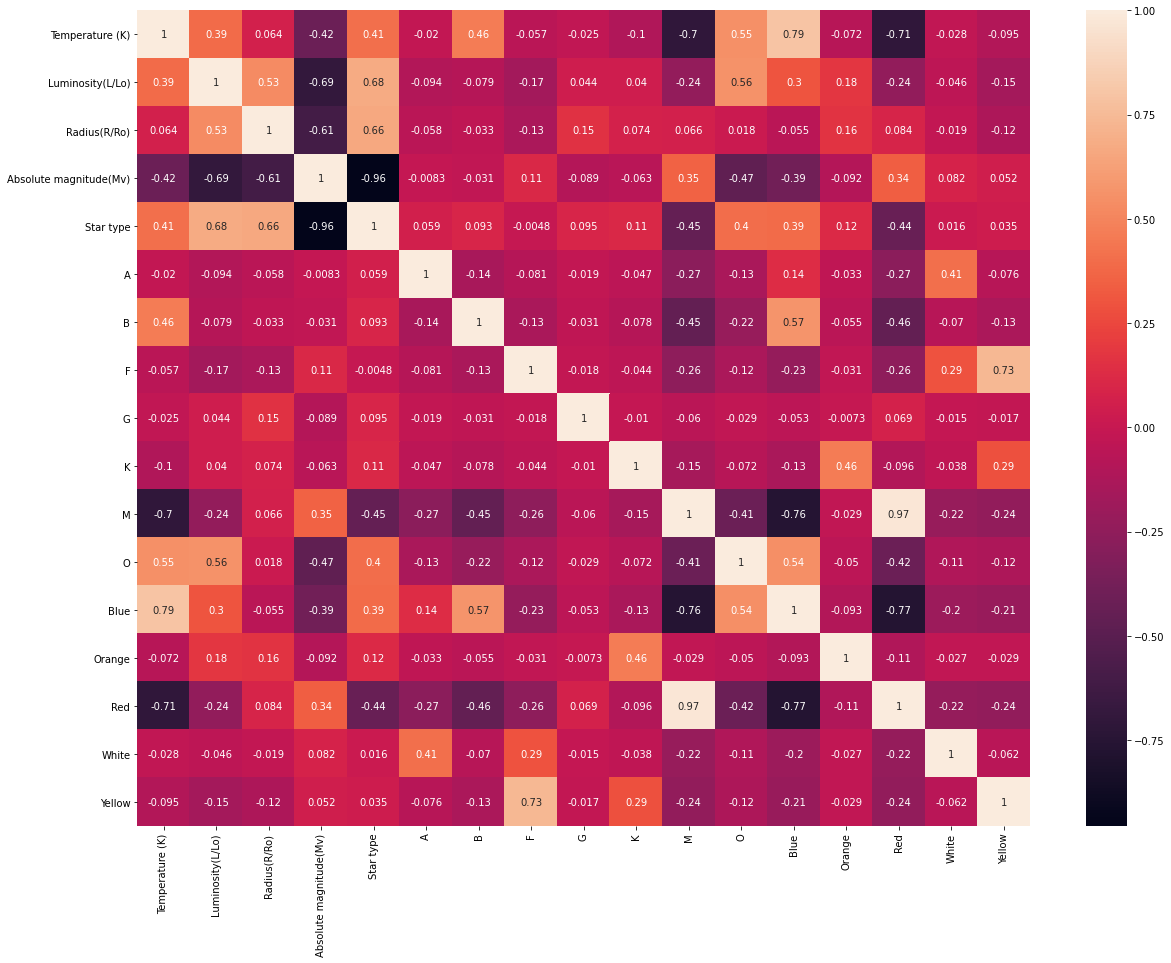

In [315]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True)

As we have seen before, the correlation matrix shows us that the temperature is not a feature that gives much information on the star type. Yet, because it has a positive correlation, it means that as the temperature gets hotter, the star type on the MKK scale gets higher (caracterizing the fact that type 0 & 1 are very cold).



We can also see here that the color (-0.44 < color correlations factor < 0. 39) and the spectral type ( -0.45 < spectral correlations factor < 0.4) have no much influence on the star type.

Then, we will drop all colors columns and all spectral type columns for a first try.

In [316]:
df.drop(['A', 'B', 'F', 'G', 'K', 'M', 'O', 'Blue', 'Orange', 'Red', 'White', 'Yellow', 'Temperature (K)', 'Luminosity(L/Lo)'], axis=1, inplace=True)
df

,Radius(R/Ro),Absolute magnitude(Mv),Star type
0,0.1700,16.12,0
1,0.1542,16.60,0
2,0.1020,18.70,0
3,0.1600,16.65,0
4,0.1030,20.06,0
...,...,...,...
235,1356.0000,-9.93,5
236,1194.0000,-10.63,5
237,1423.0000,-10.73,5
238,1112.0000,-11.23,5


# **III - Prediction of Star type**


## **Decision Tree Classifier**

### Training

As we have seen in the documentary research and with the previous graphics, the classification of stars in the MKK system appears to be **really split on some feature**. And one feature can decide for itself if the star should be either a dwarf or a giant.
Hence, we will start to build a predicter with a **decision tree classifier**.

In [345]:
from sklearn.model_selection import train_test_split

# Splitting the dataset in a train set of size 80% and a test set of size 20%
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Star type'], axis=1), df['Star type'], test_size=0.20, random_state=6)

In [346]:
from sklearn.tree import DecisionTreeClassifier

# Creating the decision tree and training it with the train dataset
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predicting the output Star type from the test dataset features
predictions = dtree.predict(X_test)



### Results

In [347]:
from sklearn.metrics import classification_report,confusion_matrix

# Generating the confusion matrix from the predictions
# The confusion matrix shows us how many of type X have been misidentified as other types and how many have been well predicted.
cm = confusion_matrix(y_test,predictions)

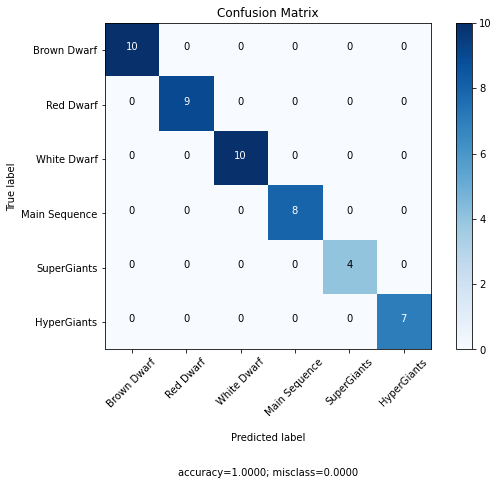

In [348]:
import itertools

# Computing the accuracy and the misclass
accuracy = np.trace(cm) / np.sum(cm).astype('float')
misclass = 1 - accuracy

# Creating a figure with a gradiant of color
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()

# Showing the real names aside the axis
target_names = ["Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "SuperGiants", "HyperGiants"]
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)


# Filling the figure
color_threshold = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  # If the background is dark, the text color should be white, else it should be black
  color = "white" if cm[i, j] > color_threshold else "black"
  # The text of the (j,i) box is the the number of stars of true type j that have been predicted as type i
  plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color=color)


# Rendering
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('\nPredicted label\n\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()


### Interpreting results

The decision tree we built succeed to predict the type of all 48 test stars (accuracy = 1 and all predicted label matching the associated true label). We hence should have a quiet good predicter, let's see how it worked.

In [349]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [350]:
 # Getting the features
df_feat=df.drop('Star type',axis=1)
features= list(df_feat.columns)

In [351]:
# Exporting the graph to a StringIO Object.
dot_data=StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True,)

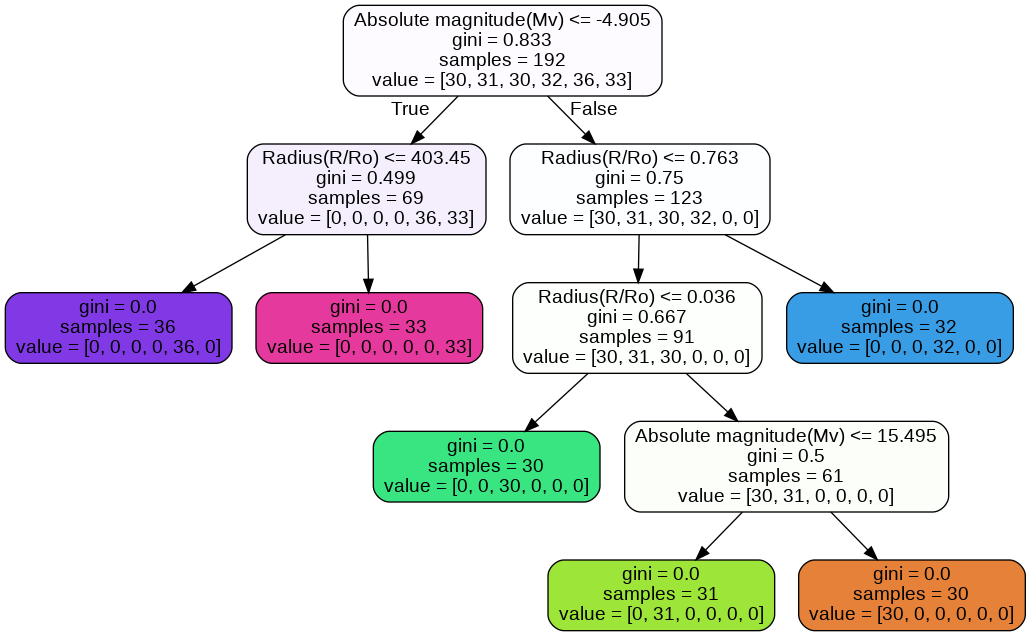

In [352]:
# Showing the tree
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In order to successfully achieve 100% true predictions, the tree uses only two features : The absolute magnitude and the radius. 

Let's plot a graphic of the absolute magnitude in function of the radius.

<Figure size 2880x2880 with 0 Axes>

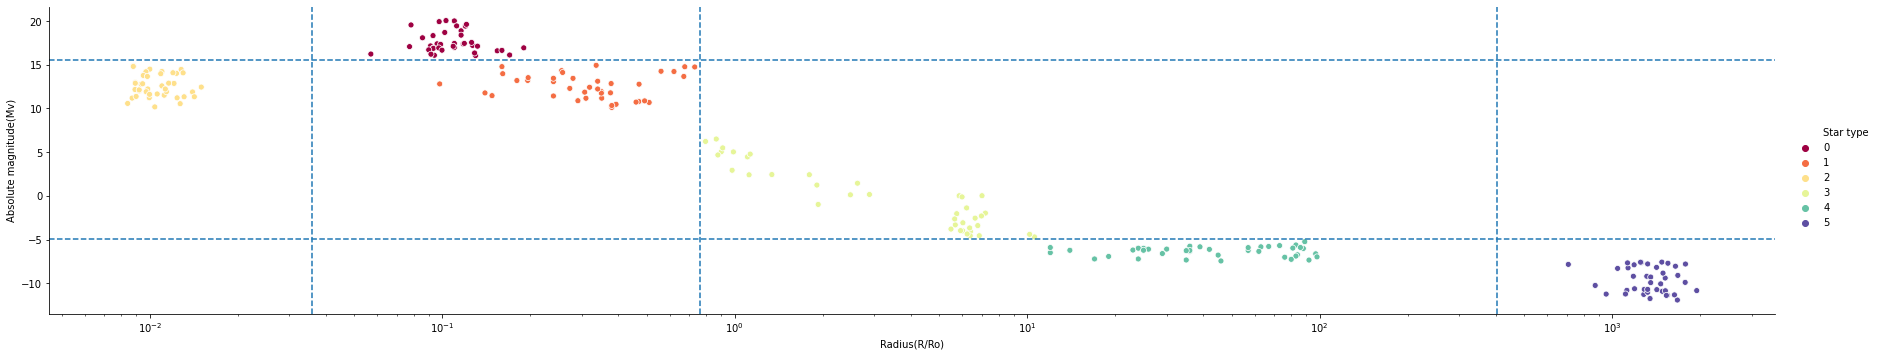

In [353]:
figure= plt.figure(figsize=(40,40))

g = sns.relplot(x="Radius(R/Ro)", y="Absolute magnitude(Mv)", hue="Star type", legend="full", palette="Spectral", aspect=5,data=df)


ax = g.fig.axes[0]

# Adding the split lines from the decision tree
# Magnitudes
ax.axhline(15.495, ls='--')
ax.axhline(-4.905, ls='--')

# Radiuses
ax.axvline(0.036, ls='--')
ax.axvline(0.763, ls='--')
ax.axvline(403.45, ls='--')

# Since the radius goes from 10^-2 to 10^3, setting the x scale to logarithmic to enhance lisibility.
ax.set_xscale("log")

The representation given here is quite satisfying as it split well the stars of every type.

# **IV - Conclusion**


This study introcuded a new way to represent the star types on a graph, by having them plotted on an absolute magnitude y-axis and on an logarithmic radius x-axis.

Nonetheless this represenation needs to be improved as the limit between star types is really thight. We can also imagine that having a radius criteria to split the stars of the main sequences and the giants ones could help enhance this representation.

More data could help the model to be more accurate.

# **IV - Acknowledgment**

* https://en.wikipedia.org/wiki/Stellar_classification#Yerkes_spectral_classification
* https://en.wikipedia.org/wiki/Absolute_magnitude
* https://en.wikipedia.org/wiki/Brown_dwarf
* https://en.wikipedia.org/wiki/Red_dwarf
* https://en.wikipedia.org/wiki/White_dwarf
* https://en.wikipedia.org/wiki/Main_sequence
* https://en.wikipedia.org/wiki/Supergiant_star
* https://en.wikipedia.org/wiki/Hypergiant